In [28]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

url =  "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/1.01.%20Simple%20linear%20regression.csv"
data = pd.read_csv(url)

x = torch.tensor(data['GPA'].values, dtype=torch.float32)
x = x.view(-1, 1)

y = torch.tensor(data['SAT'].values, dtype=torch.float32)
y = y.view(-1, 1)

print(data.head())

#import libraries, data, and define variables

    SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83


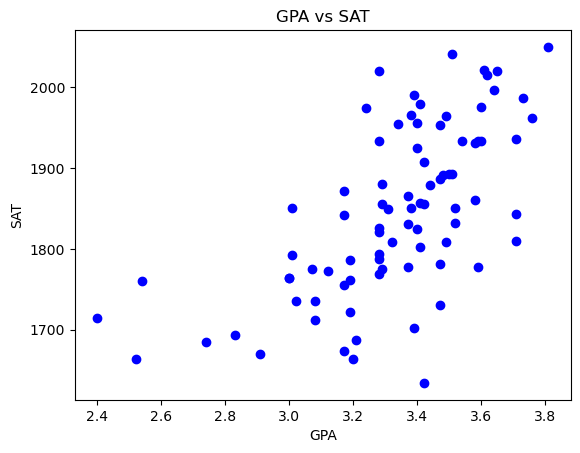

In [29]:
plt.scatter(x.numpy(), y.numpy(), color='blue')
plt.xlabel('GPA')
plt.ylabel('SAT')
plt.title('GPA vs SAT')
plt.show()

#plot data points

In [30]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True) 
func  = x * w + b

# define regression model and initialize first parameter values

learning_rate = 0.01 #agression of model: step size in gradient descent
epochs = 100000 #pass thorugh data set upt to 1000 data points

for epoch in range(epochs):
    func = x * w + b #defines our linear regression function
    loss = torch.mean((y - func)**2) #defines loss function as Mean Least Squared Regression function
    loss.backward() #backproppagation to find local gradients
    with torch.no_grad(): #takes a step in loss function in direction opposite of greatest ascent
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        w.grad.zero_() #clears gradient storage so that it can be iterated through fresh each z
        b.grad.zero_()
        
        w_final = w.item()
        b_final = b.item()  

    # Print loss every 100 epochs
    if (epoch+1) % 10000 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

print (w_final, b_final)

Epoch 10000/100000, Loss: 6870.5239
Epoch 20000/100000, Loss: 6454.6914
Epoch 30000/100000, Loss: 6416.9033
Epoch 40000/100000, Loss: 6413.4697
Epoch 50000/100000, Loss: 6413.1577
Epoch 60000/100000, Loss: 6413.1294
Epoch 70000/100000, Loss: 6413.1289
Epoch 80000/100000, Loss: 6413.1289
Epoch 90000/100000, Loss: 6413.1289
Epoch 100000/100000, Loss: 6413.1289
245.3614501953125 1028.15869140625


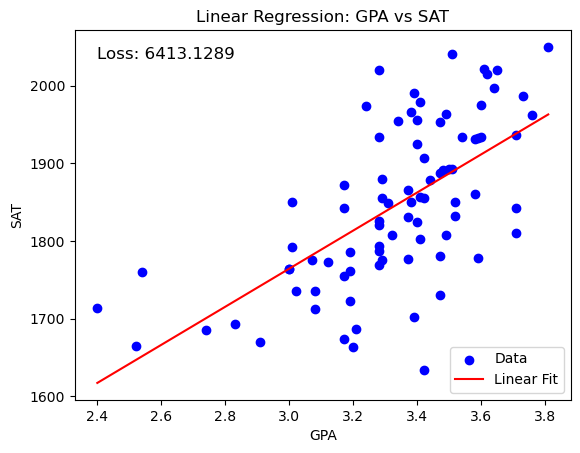

In [31]:
# Compute predictions using the trained weights
y_line = w_final * x.numpy() + b_final

# Compute final loss
loss_final = torch.mean((y - (w*x + b))**2).item()

# Scatter plot of the original data
plt.scatter(x.numpy(), y.numpy(), color='blue', label='Data')

# Plot the linear regression line
plt.plot(x.numpy(), y_line, color='red', label='Linear Fit')

# Place final loss in top-left corner of the plot
plt.text(min(x.numpy()), max(y.numpy()), f'Loss: {loss_final:.4f}',
         fontsize=12, color='black', verticalalignment='top', horizontalalignment='left')

# Labels, title, and legend
plt.xlabel('GPA')
plt.ylabel('SAT')
plt.title('Linear Regression: GPA vs SAT')
plt.legend()
plt.show()